# Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import torch, os
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from models import VAEGT

# Initialize model & dataloader

In [2]:
# Model

model = VAEGT(in_dims=784, hid1_dims=100, hid2_dims=64, num_classes=10)
model.load_state_dict(torch.load('checkpoints/vaegt.pth', map_location='cpu')['state_dict'])
model.eval();

In [3]:
# Dataloader

data_dir = "/media/antiaegis/storing/datasets/"
os.makedirs(data_dir, exist_ok=True)
dataset = datasets.MNIST(data_dir, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
]))

# Encode and reconstruct images

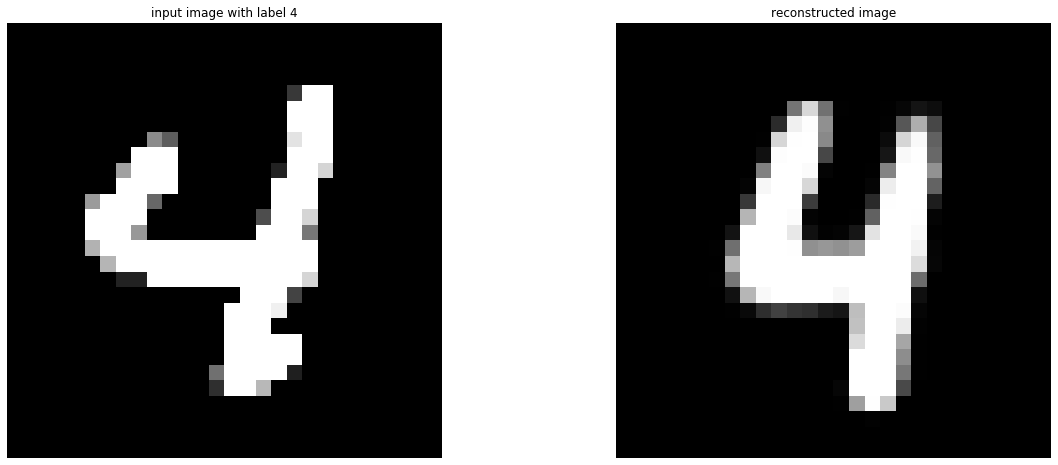

In [4]:
idx = np.random.randint(0, len(dataset.targets), ())
image, label = dataset.__getitem__(idx)

input = image.view(1,-1)
label = torch.tensor([[label]])

output = model(input, label)
recons_img = output.view(28, 28).detach().cpu().numpy()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1); plt.imshow(image.cpu().numpy()[0,...], vmin=0.0, vmax=1.0, cmap='gray'); plt.axis('off'); plt.title('input image with label %d'%(label))
plt.subplot(1,2,2); plt.imshow(recons_img, vmin=0.0, vmax=1.0, cmap='gray'); plt.axis('off'); plt.title('reconstructed image')
plt.show()

# Generate images

Generated images conditioned by label 0


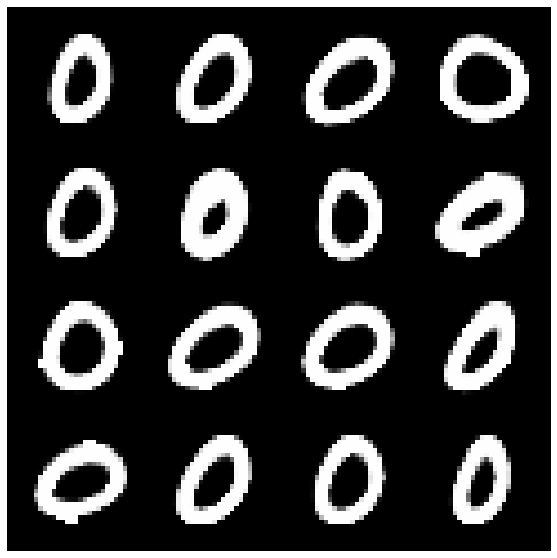

In [10]:
LABEL = 0
with torch.no_grad():
    labels = torch.cat([torch.tensor([[LABEL]]) for i in range(16)], dim=0)
    outputs = model.generate(labels)
    outputs = outputs.view(-1, 1, 28, 28)
    grid_img = make_grid(outputs.data, nrow=4, normalize=True).cpu().numpy().transpose((1,2,0))

plt.figure(figsize=(10,10))
plt.imshow(grid_img)
plt.axis('off')
print("Generated images conditioned by label %d"%(LABEL))
plt.show()